In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('stocks.csv')
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


# Time Series Analysis

## Autocorrelation and Partial Autocorrelation Plots
* Autocorrelation plot: It shows the correlation of the series with itself lagged by x time units.
* Partial Autocorrelation plot: It shows the correlation of the series with itself lagged by x time units but after eliminating the variations explained by the intervening comparisons.

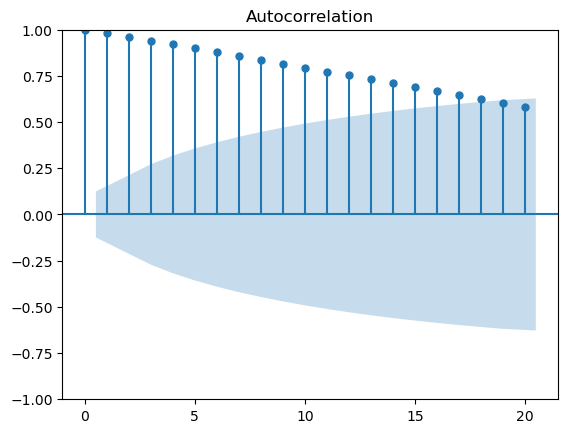

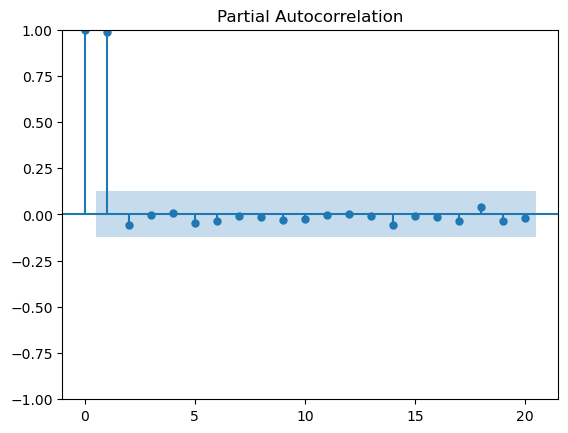

In [3]:
# Plot_ACF
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Adj Close'], lags=20)
plt.show();

plot_pacf(df['Adj Close'], lags=20)
plt.show();

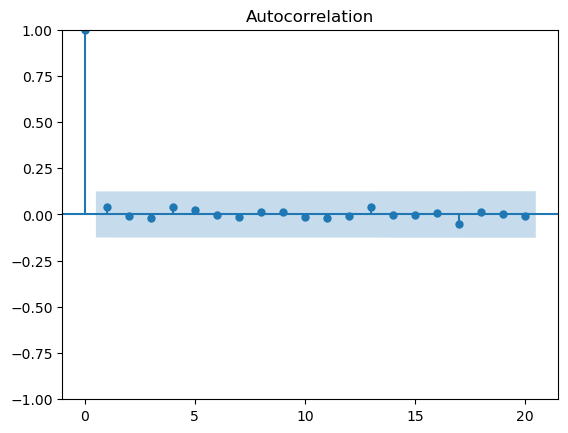

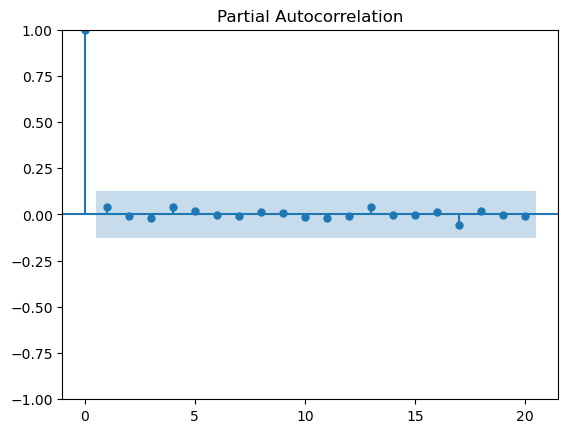

In [4]:
# Plot_ACF for 1st difference
plot_acf(df['Adj Close'].diff().dropna(), lags=20)
plt.show();

plot_pacf(df['Adj Close'].diff().dropna(), lags=20)
plt.show();

## Moving Average
* Moving average is a method of time series forecasting used in finance. It is a simple calculation that takes the arithmetic mean of a given set of values. In finance, a moving average (MA) is a stock indicator that is commonly used in technical analysis.

In [5]:
# Obtain the day and month from the Date column
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [6]:
# Create a new column 'Quarter'
df['Quarter'] = df['Month'].apply(lambda x: 1 if x <= 3 else (2 if x <= 6 else (3 if x <= 9 else 4)))
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Quarter
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,7,2,1
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,8,2,1
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,9,2,1
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,10,2,1
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,13,2,1


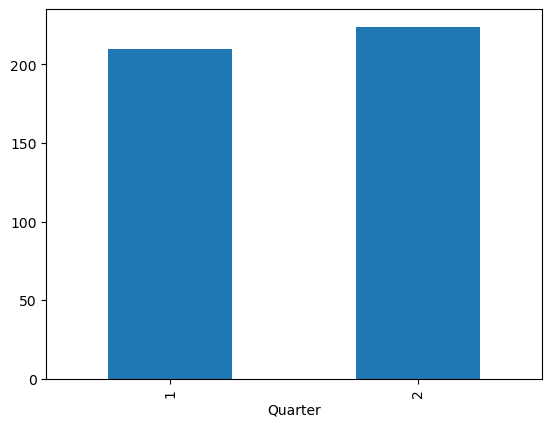

In [7]:
# Mean of Adj Close price for each quarter
df.groupby('Quarter')['Adj Close'].mean()

# Plot the mean of Adj Close price for each quarter
df.groupby('Quarter')['Adj Close'].mean().plot(kind='bar')
plt.show();

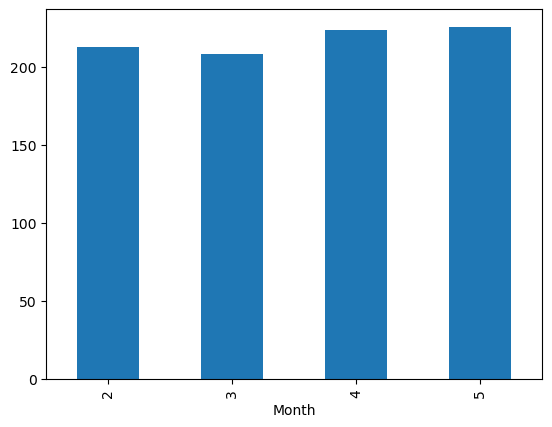

In [8]:
# Plot the mean of Adj Close price for each month
df.groupby('Month')['Adj Close'].mean().plot(kind='bar')
plt.show();

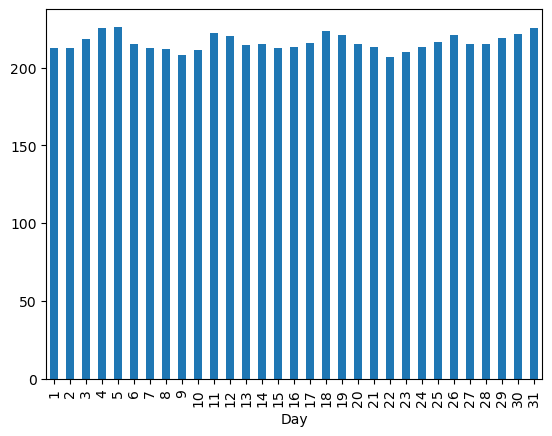

In [10]:
# Plot the mean of Adj Close price for each day
df.groupby('Day')['Adj Close'].mean().plot(kind='bar')
plt.show(); 

In [11]:
# Moving average
df['MA_9'] = df['Adj Close'].rolling(9).mean().shift() # 9 days moving average
df['MA_21'] = df['Adj Close'].rolling(21).mean().shift() # 21 days moving average
df['MA_55'] = df['Adj Close'].rolling(55).mean().shift() # 55 days moving average
df['MA_200'] = df['Adj Close'].rolling(200).mean().shift() # 200 days moving average

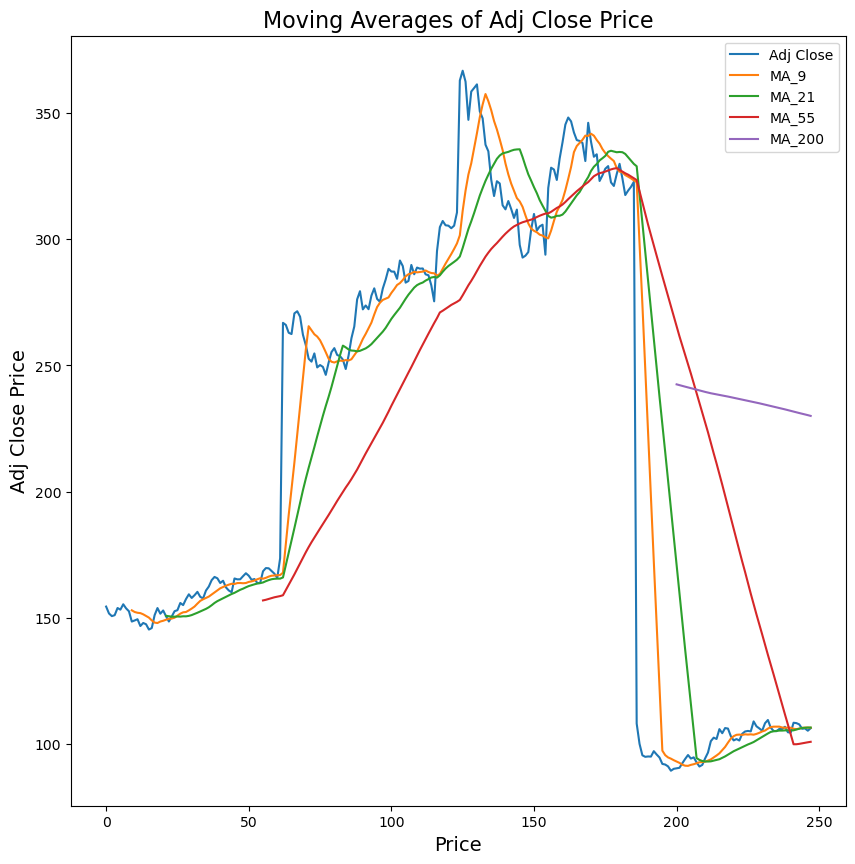

In [13]:
# Plot the moving averages
df[['Adj Close', 'MA_9', 'MA_21', 'MA_55', 'MA_200']].plot(figsize=(10, 10))
plt.title('Moving Averages of Adj Close Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Adj Close Price', fontsize=14)
plt.show();

* The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price.

* For example, a 10-day MA takes the closing prices for the past 10 days, adds them together and divides them by 10 (in this case, there is no lag between the dates of when the stock closes and re-opens for trading). The result is a new average that will be plotted on the chart, along with the next day's moving average.


* *Exponential Moving Average is a type of moving average that places a greater weight and significance on the most recent data points. The exponential moving average is also referred to as the exponentially weighted moving average. An exponentially weighted moving average reacts more significantly to recent price changes than a simple moving average (SMA), which applies an equal weight to all observations in the period.

In [14]:
# Exponential Moving Average
def exp_ma(data, days):
    alpha = 2/(days+1)
    ema = data.ewm(alpha=alpha, adjust=False).mean()
    return ema

df['EMA_9'] = exp_ma(df['Adj Close'], 9)
df['EMA_21'] = exp_ma(df['Adj Close'], 21)
df['EMA_55'] = exp_ma(df['Adj Close'], 55)

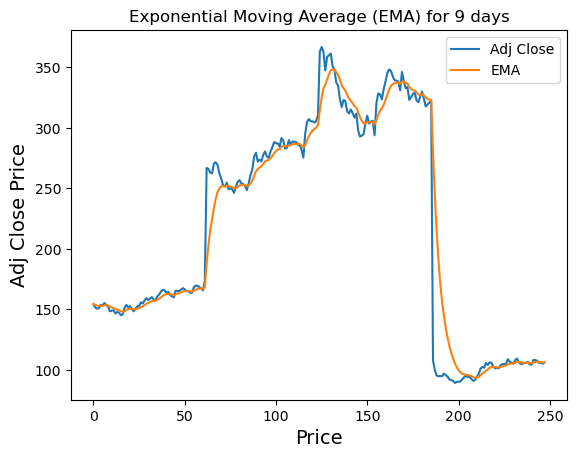

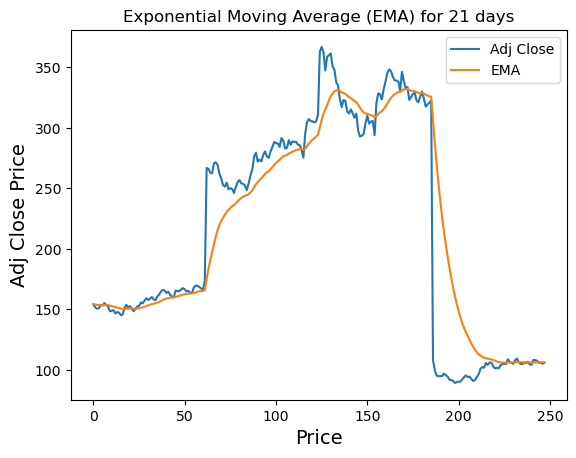

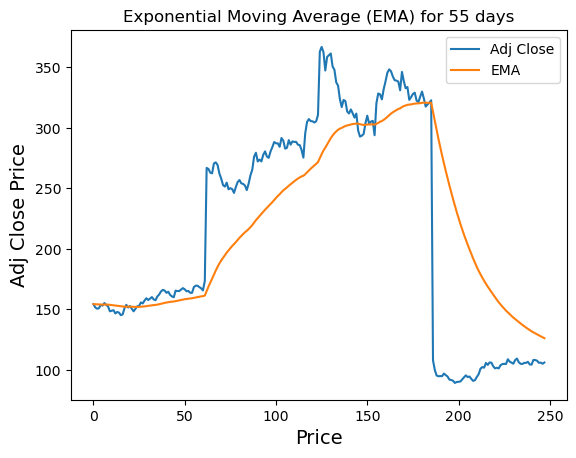

In [17]:
# Plot the exponential moving averages
def plot_ema(data, days):
    ema = exp_ma(data, days)
    plt.plot(data, label='Adj Close')
    plt.plot(ema, label='EMA')
    # Add specififc EMA number to the title
    plt.title('Exponential Moving Average (EMA) for {} days'.format(days))
    plt.xlabel('Price', fontsize=14)
    plt.ylabel('Adj Close Price', fontsize=14)
    plt.legend()
    plt.show();

plot_ema(df['Adj Close'], 9)
plot_ema(df['Adj Close'], 21)
plot_ema(df['Adj Close'], 55)

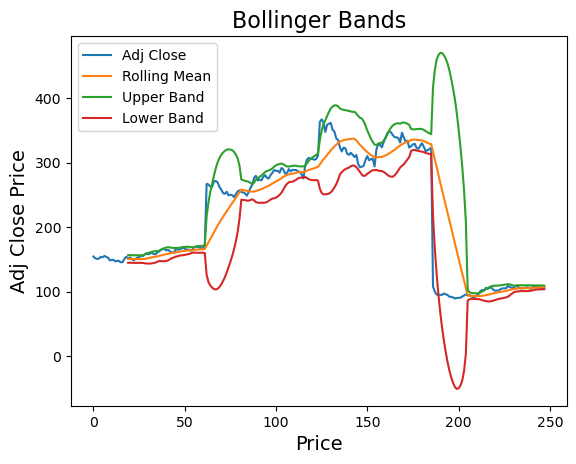

In [18]:
# Bollinger Bands ie 20 days moving average
def bollinger_bands(data, days):
    # Calculate rolling mean and standard deviation
    rm = data.rolling(window=days).mean()
    rstd = data.rolling(window=days).std()
    upper_band = rm + 2*rstd
    lower_band = rm - 2*rstd
    return rm, upper_band, lower_band

rm, upper_band, lower_band = bollinger_bands(df['Adj Close'], 20)

# Plot
plt.plot(df['Adj Close'], label='Adj Close')
plt.plot(rm, label='Rolling Mean')
plt.plot(upper_band, label='Upper Band')
plt.plot(lower_band, label='Lower Band')
plt.title('Bollinger Bands', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Adj Close Price', fontsize=14)
plt.legend();

## ARIMA
* ARIMA stands for Auto-Regressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data.
* It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

* This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:
	* AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
	* I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step)
    * MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.


In [19]:
from statsmodels.tsa.stattools import adfuller
 # Null Hypothesis: time series is non-stationary
def adf_test(series,title=''):
    print('*******************************')
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

adf_test(df['Adj Close'], title='Original Series')


*******************************
Augmented Dickey-Fuller Test: Original Series
ADF test statistic       -1.191388
p-value                   0.677289
# lags used               0.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


**ADF Test ie Augmented Dickey-Fuller Test
- Null Hypothesis: time series is non-stationary
- If the p-value is less than the significance level (typically 5%), then we can reject the null hypothesis that the time series is non-stationary.
- If the p value is greater than the significance level, then we fail to reject the null hypothesis.
- If the test statistic is less than the critical value, we can reject the null hypothesis.
- If the test statistic is greater than the critical value, we fail to reject the null hypothesis.

- we want the p-value to be less than the significance level (0.05) and the test statistic to be less than the critical value (5%). If these two conditions are met, we can say that the time series is stationary.
- stationary time series is easier to model and will likely result in more reliable forecasts.
- on the other hand, if the time series is non-stationary, we will have to take some steps to make it stationary, which will be discussed in the next section.

* Stationary data means that the statistical properties of a process generating a time series do not change over time. Thus, stationary data will have no predictable patterns in the long-term. Time plots will show the series to be roughly horizontal (although some cyclic behaviour is possible), with constant variance whereas non-stationary data will show trends, cycles and random variations.
* Ideally, we want to model stationary data. In this case, we can model the statistical properties of the data generating process with a set of fixed parameters. In contrast, non-stationary data will require time-dependent parameters to model.

In [20]:
# Make the time series stationary
df['Adj Close_diff'] = df['Adj Close'].diff()
df['Adj Close_diff'].dropna(inplace=True)
adf_test(df['Adj Close_diff'], title='1st Order Differencing')

*******************************
Augmented Dickey-Fuller Test: 1st Order Differencing
ADF test statistic     -1.498641e+01
p-value                 1.142119e-27
# lags used             0.000000e+00
# observations          2.460000e+02
critical value (1%)    -3.457215e+00
critical value (5%)    -2.873362e+00
critical value (10%)   -2.573070e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


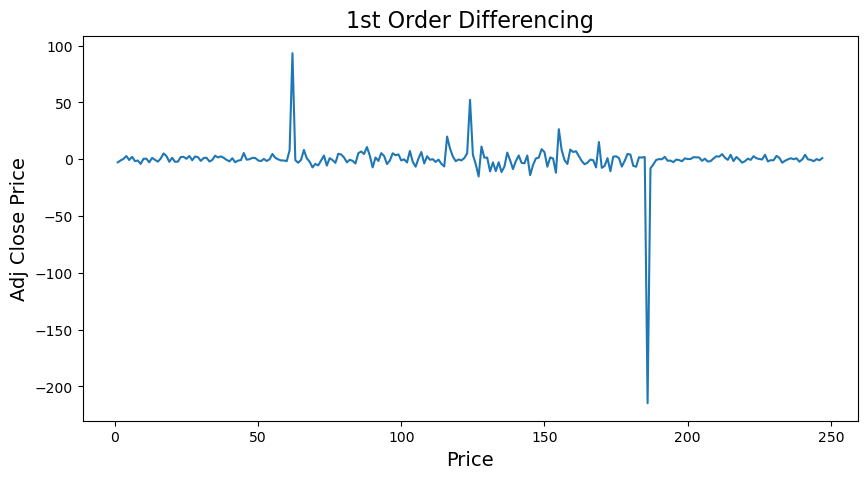

In [21]:
# Plot the 1st order differencing
df['Adj Close_diff'].plot(figsize=(10, 5))
plt.title('1st Order Differencing', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Adj Close Price', fontsize=14)
plt.show();

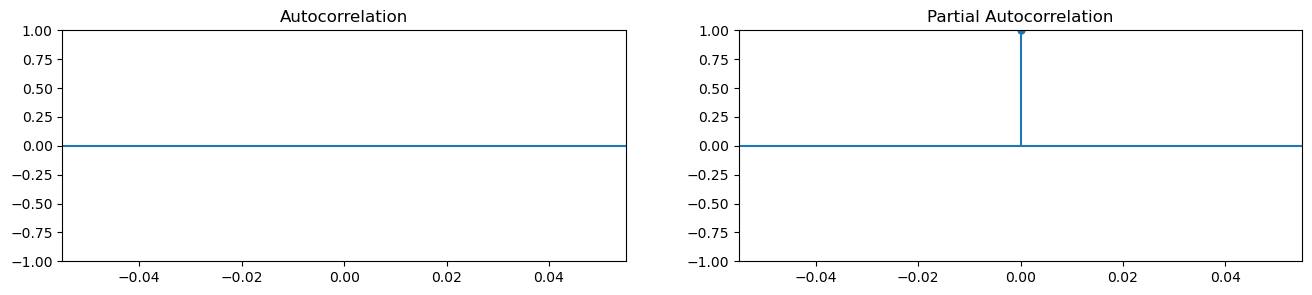

In [22]:
# ACF and PACF plots for 1st order differencing
def plot_acf_pacf(data, lags):
    fig, ax = plt.subplots(1,2,figsize=(16,3))
    plot_acf(data, lags=lags, ax=ax[0])
    plot_pacf(data, lags=lags, ax=ax[1])
    plt.show();

plot_acf_pacf(df['Adj Close_diff'], lags=20)

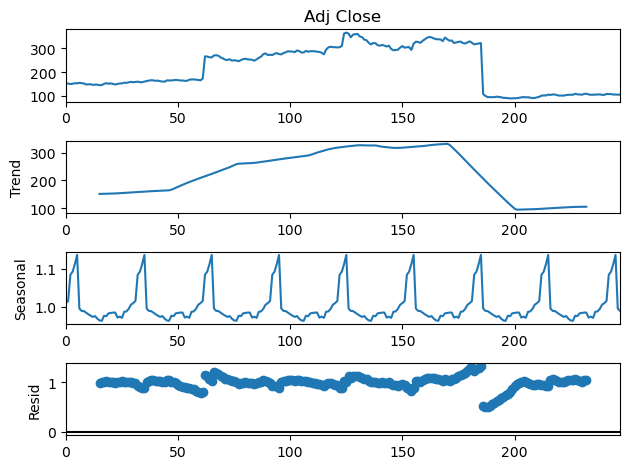

In [24]:
# Time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=30)

# Plot the decomposition
result.plot();

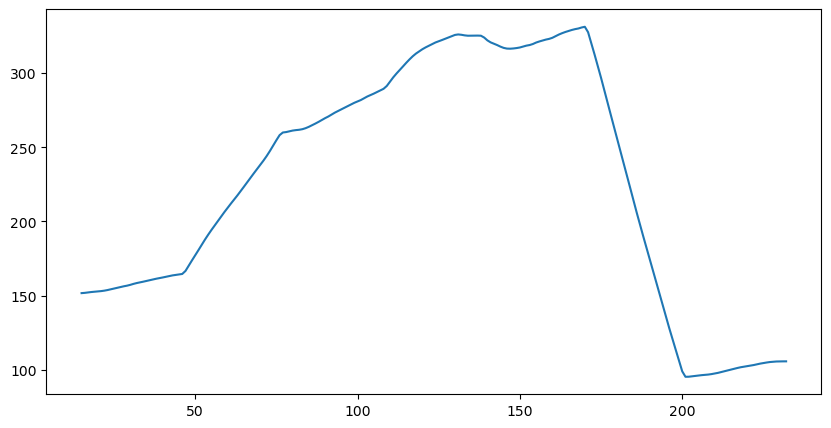

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(result.trend, label='Trend')

In [31]:
# Split the data into train and test sets
df['Date'].min(), df['Date'].max()

('2023-02-07', '2023-05-05')

In [32]:
# Our min is '2023-02-07' and max is '2023-05-05'
# A function to create train and test setsallocating 80% of the data for training and 20% for testing 
# Split using date
def train_test_split(data, split_date):
    train = data.loc[data['Date'] <= split_date]
    test = data.loc[data['Date'] > split_date]
    return train, test

train, test = train_test_split(df, '2023-04-05')
# Since we are using time series data, we cannot use random split

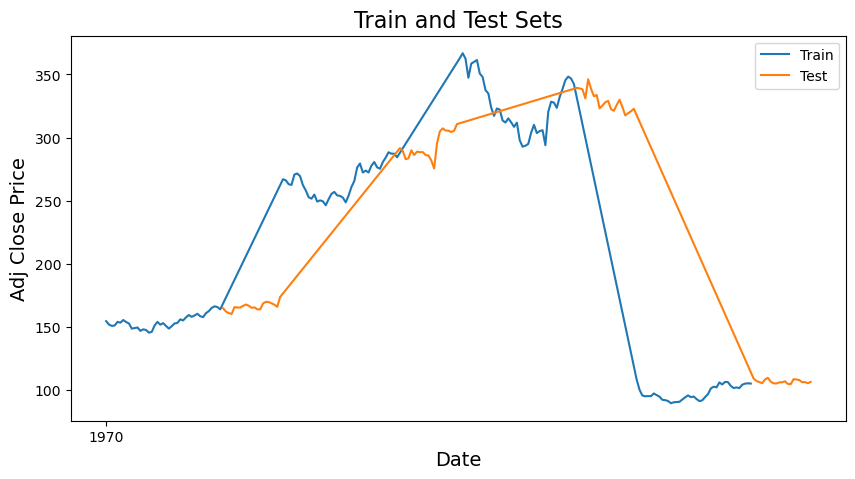

In [33]:

# Plot the train and test sets
plt.figure(figsize=(10, 5))
plt.plot(train['Adj Close'], label='Train')
plt.plot(test['Adj Close'], label='Test')
plt.title('Train and Test Sets', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adj Close Price', fontsize=14)
plt.legend()
plt.show();

In [36]:
# Model
from statsmodels.tsa.arima.model import ARIMA
# arima_model is deprecated, use ARIMA instead
model = ARIMA(train['Adj Close'], order=(1, 1, 1)) # p, d, q
results = model.fit()


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                  164
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -731.142
Date:                Mon, 05 Jun 2023   AIC                           1468.284
Time:                        17:45:42   BIC                           1477.565
Sample:                             0   HQIC                          1472.052
                                - 164                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1057     11.028      0.010      0.992     -21.508      21.719
ma.L1         -0.0657     11.085     -0.006      0.995     -21.791      21.660
sigma2       460.9005     11.033     41.775      0.000     439.277     482.524
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             53716.73
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.07   Skew:                            -6.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        90.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

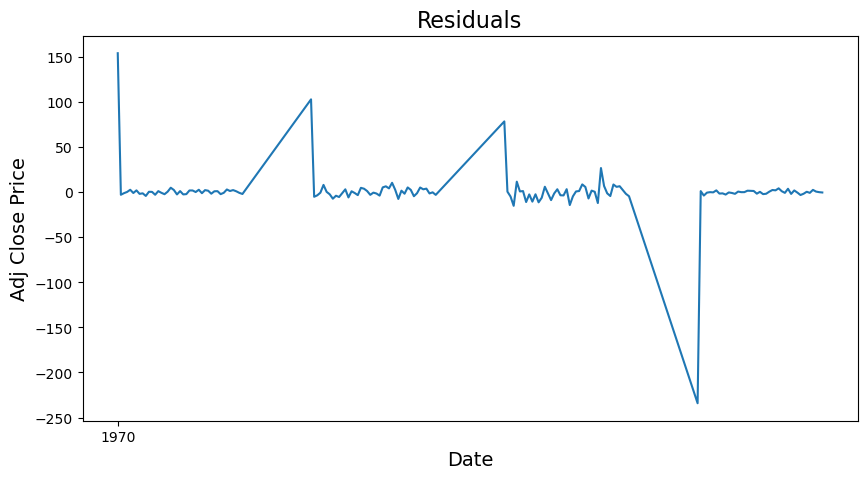

In [38]:
# Next we will plot the residuals to ensure there are no patterns (that is, look for constant mean and variance)
# Plot the residuals
plt.figure(figsize=(10, 5))
plt.plot(results.resid)
plt.title('Residuals', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adj Close Price', fontsize=14)
plt.show();

### Evaluate the model
* We will use the mean absolute percentage error (MAPE) to evaluate the model
* MAPE is the average of the absolute difference between the predicted and actual values,divided by the actual value
* MAPE is a percentage, and can be interpreted as follows:
- 0% means the model is 100% accurate
- 100% means the model is 0% accurate
- The lower the MAPE, the better the model

### Forecasting
* We will use the forecast() function from the forecast package to forecast the next 12 months

In [42]:
# Import the mean_absolute_percentage_error function
from sklearn.metrics import mean_absolute_percentage_error

# Predict the values for the test set
preds = results.forecast(steps=len(test))

# Calculate the MAPE
mape = mean_absolute_percentage_error(test['Adj Close'], preds)

# Print the MAPE
print(f'MAPE: {mape}')

MAPE: 0.4263213108152802


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


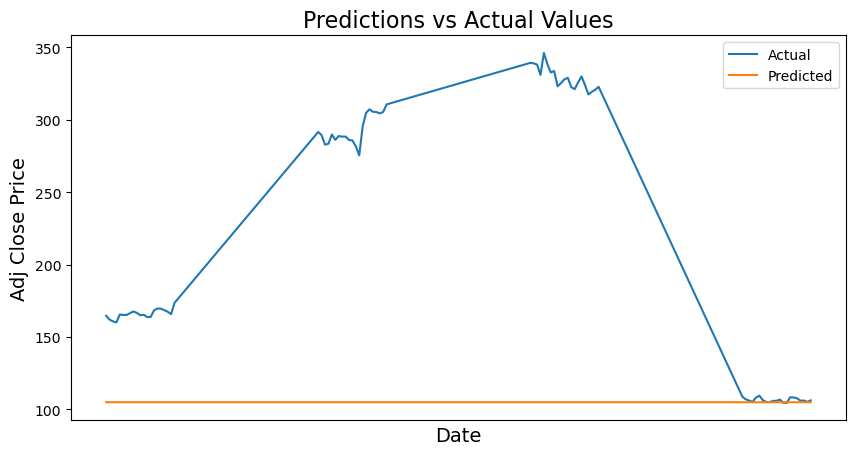

In [43]:
# Plot the predictions against the actual values
plt.figure(figsize=(10, 5))
plt.plot(test['Adj Close'], label='Actual')
plt.plot(test.index, preds, label='Predicted')
plt.title('Predictions vs Actual Values', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adj Close Price', fontsize=14)
plt.legend();

In [44]:
# Predict the values for the future
preds = results.forecast(steps=30)
print(f'The predictions for the next 30 days are: \n{preds}')

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


The predictions for the next 30 days are: 
164    104.943942
165    104.943302
166    104.943234
167    104.943227
168    104.943226
169    104.943226
170    104.943226
171    104.943226
172    104.943226
173    104.943226
174    104.943226
175    104.943226
176    104.943226
177    104.943226
178    104.943226
179    104.943226
180    104.943226
181    104.943226
182    104.943226
183    104.943226
184    104.943226
185    104.943226
186    104.943226
187    104.943226
188    104.943226
189    104.943226
190    104.943226
191    104.943226
192    104.943226
193    104.943226
Name: predicted_mean, dtype: float64


Bonus: Modelling with Prophet
* Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.
* Prophet works best with time series that have strong seasonal effects and several seasons of historical data. For more information on Prophet, please refer to the [Prophet documentation](https://facebook.github.io/prophet/docs/quick_start.html#python-api).

18:04:04 - cmdstanpy - INFO - Chain [1] start processing
18:04:07 - cmdstanpy - INFO - Chain [1] done processing


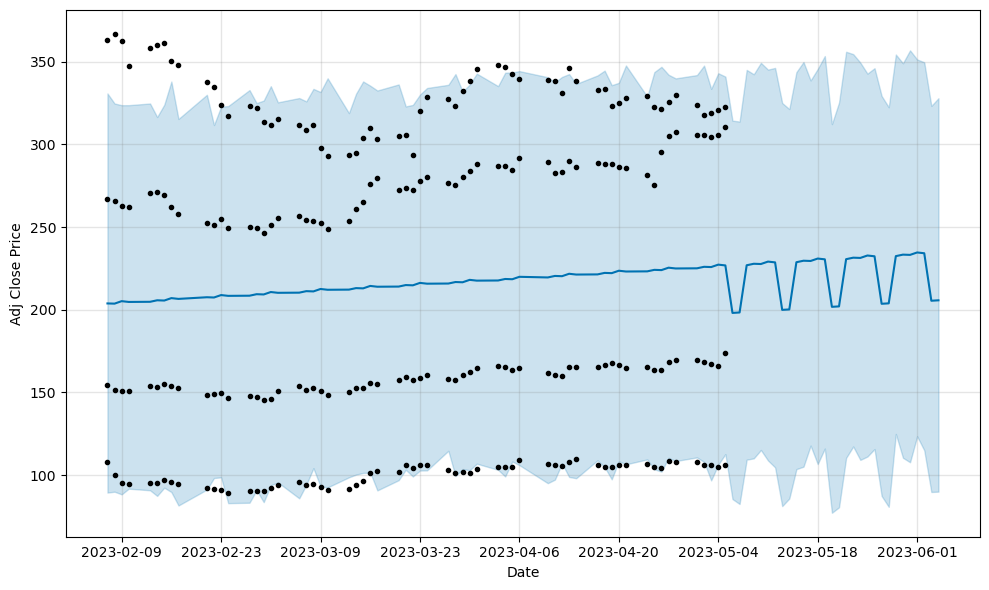

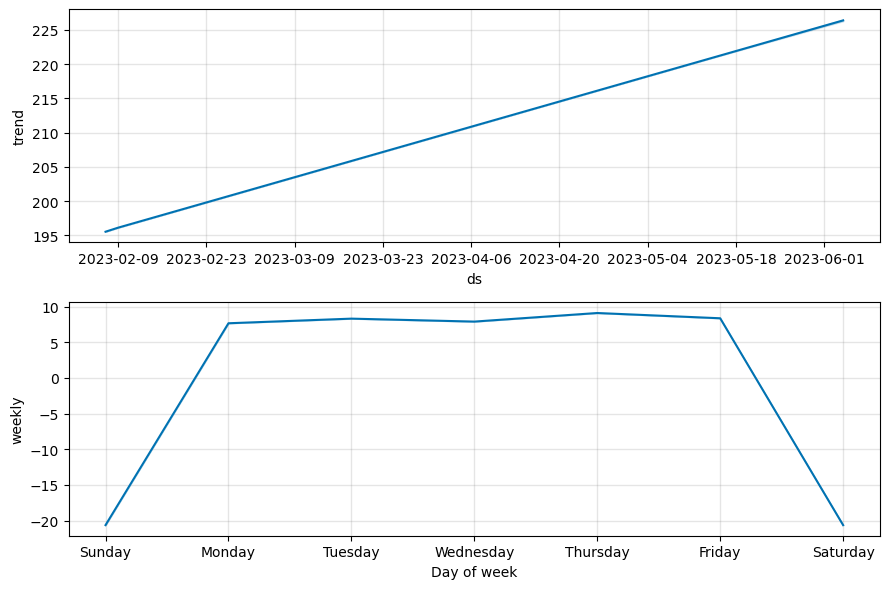

In [48]:
# Prophet model
from prophet import Prophet

# Create a new dataframe with only the 'Date' and 'Adj Close' columns
df_prophet = df[['Date', 'Adj Close']]
df_prophet = df_prophet.rename(columns={'Date': 'ds', 'Adj Close': 'y'})

# Instantiate the Prophet model
model = Prophet()

# Fit the model
model.fit(df_prophet)

# Create a future dataframe
future = model.make_future_dataframe(periods=30)

# Predict the values
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast, xlabel='Date', ylabel='Adj Close Price');

# Plot the components
model.plot_components(forecast);

Epoch 1/100
6/6 [==============================] - 30s 968ms/step - loss: 0.1901 - val_loss: 0.0121
Epoch 2/100
6/6 [==============================] - 1s 197ms/step - loss: 0.0453 - val_loss: 0.0110
Epoch 3/100
6/6 [==============================] - 1s 188ms/step - loss: 0.0210 - val_loss: 0.0017
Epoch 4/100
6/6 [==============================] - 1s 183ms/step - loss: 0.0301 - val_loss: 0.0034
Epoch 5/100
6/6 [==============================] - 1s 170ms/step - loss: 0.0194 - val_loss: 0.0089
Epoch 6/100
6/6 [==============================] - 1s 219ms/step - loss: 0.0185 - val_loss: 0.0043
Epoch 7/100
6/6 [==============================] - 1s 173ms/step - loss: 0.0153 - val_loss: 0.0025
Epoch 8/100
6/6 [==============================] - 1s 180ms/step - loss: 0.0159 - val_loss: 0.0034
Epoch 9/100
6/6 [==============================] - 1s 196ms/step - loss: 0.0148 - val_loss: 0.0035
Epoch 10/100
6/6 [==============================] - 1s 254ms/step - loss: 0.0146 - val_loss: 0.0021
Epoch 11

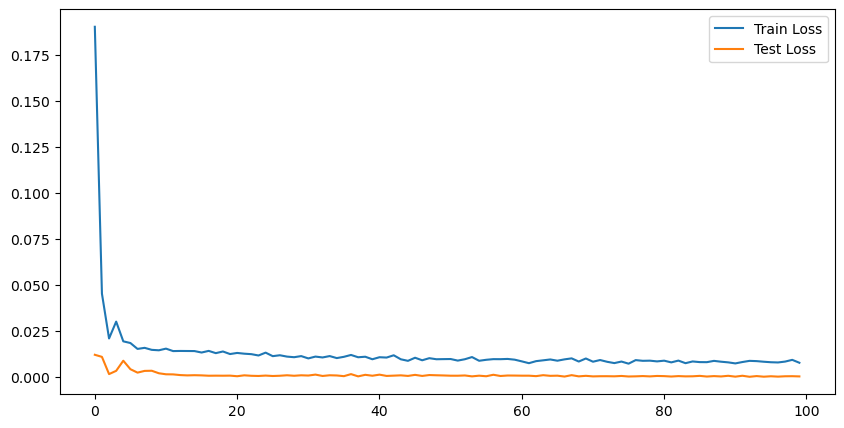

In [63]:
# LSTM model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# LSTM for time series data
cutoff = int(len(df)*0.8)
train = df[:cutoff]
test = df[cutoff:]

# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train[['Adj Close']])
train['Adj Close'] = scaler.transform(train[['Adj Close']])
test['Adj Close'] = scaler.transform(test[['Adj Close']])

# Create a function to process the data into 7 day look back slices
def processData(data, lb):
    X, y = [], []
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb), 0])
        y.append(data[(i+lb), 0])
    return np.array(X), np.array(y)

# Create the X and y sets
lb = 7
X_train, y_train = processData(train[['Adj Close']].values, lb)
X_test, y_test = processData(test[['Adj Close']].values, lb)

# Reshape the data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the model
model = Sequential()
model.add(LSTM(256, input_shape=(lb, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Plot the loss
plt.figure(figsize=(10, 5))
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Test Loss')
plt.legend();


In [64]:
# Evaluate the model
y_pred = model.predict(X_test)

# Calculate the MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'The Mean Absolute Percentage Error is: {mape}', '\n')

2/2 [==============================] - 5s 34ms/step
The Mean Absolute Percentage Error is: 4.47845283148485 

